<a href="https://colab.research.google.com/github/Amitish/Zomato-ML-Project/blob/main/Zomato_Mid_Assessment_ML1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Mid Assessment- Zomato   

# **Project Summary -**

This project involves employing advanced data analytics techniques to delve into the intricacies of restaurants and customer feedback on the widely-used online food delivery platform, Zomato.

We will be looking after the crucial task of data cleaning and preprocessing. Eliminating duplicate entries, addressing missing values, and transforming the data into a suitable format for analysis.

Moving forward, we will implement clustering on the restaurant data using the k-means algorithm. The aim will be to group similar restaurants together and uncover underlying patterns within the dataset.

The findings generated from this analysis will have the potential to provide valuable guidance to both restaurants and customers in making informed decisions. Moreover, the project could be extended to other cities or countries to explore eating habits and preferences across different regions.



# **Problem Statement -**

The objective of this project is to delve into the dynamics of the restaurant industry in India through an analysis of data sourced from Zomato, a leading restaurant aggregator and food delivery start-up.

This endeavor seeks to extract insights from customer reviews, segment Zomato restaurants into distinct categories, and draw meaningful conclusions through visualization techniques.

By examining data pertaining to cuisine, pricing, and customer feedback, the project aims to facilitate informed decision-making for both customers seeking the best dining experiences and the company seeking opportunities for growth and enhancement within the industry.

Furthermore, the project endeavors to conduct sentiment analysis and identify influential critics within the industry based on reviewer metadata.

.

# 1. Importing Libraries

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Collection

In [3]:
# Fetching the data
zoto = pd.read_csv("/content/drive/MyDrive/Amit_PPT/Zomato Restaurant reviews.csv")

In [ ]:
# Displaying the data
zoto

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


.

# 3. Data Wrangling/Cleaning

In [ ]:
# First will check for null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,38
2,Review,45
3,Rating,38
4,Metadata,38
5,Time,38
6,Pictures,0


In [ ]:
# Will remove the null values
# Since nulls are pretty less in number so we will then verify if 2 or more columns hold nulls in same row
# as it would be meaningless to continue with such data if 2 or more nulls are present in same row.

# Check if each row has 2 or more null values
def two_or_more_nulls(row):
    null_count = row.isnull().sum()  # Count the number of null values in the row
    return null_count >= 2

# Apply the function to each row
zoto['HasTwoOrMoreNulls'] = zoto.apply(two_or_more_nulls, axis=1)

# Display the DataFrame with the new column indicating if the row has 2 or more null values


In [ ]:
# We will select only those columns who's output is True

filtered = zoto[zoto['HasTwoOrMoreNulls']]

# Display the filtered DataFrame
print(filtered)

               Restaurant Reviewer Review Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8789  Americ

In [ ]:
zoto.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [6]:
# It is clear from above the data above that the most of the nulls are present in 2 or more columns from same row so we will remove those rows

zoto.dropna(subset=['Reviewer', 'Review', 'Rating', 'Metadata', 'Time'], inplace=True)


In [7]:
# Will recheck if all null values are removed

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Metadata,0
5,Time,0
6,Pictures,0


In [4]:
# Checking for duplicates and removing if found any

zoto.drop_duplicates(inplace=True)

In [8]:
# Its clear from the data that only 45 rows have been removed from the dataset holding nulls

zoto.shape

(9955, 7)

In [9]:
# Splitting the column and creating new columns

zoto[['Date', 'Timing']] = zoto['Time'].str.split(' ', expand=True)
zoto[['Reviewcount', 'Followers']] = zoto['Metadata'].str.split(' , ', expand=True)
zoto[['Reviews_count', 'Delete1']] = zoto['Reviewcount'].str.split(' ', expand=True)
zoto[['Follower_s', 'Delete2']] = zoto['Followers'].str.split(' ', expand=True)

In [10]:
# Segregating date into dd/mm/yy

zoto.Date = pd.to_datetime(zoto['Date'])
zoto['Year']= zoto['Date'].dt.year
zoto['Month']= zoto['Date'].dt.month
zoto['Day']= zoto['Date'].dt.day

In [11]:
# Deleting Unwanted Columns to make Dataset more clean

zoto.drop("Metadata", axis=1, inplace=True)
zoto.drop("Time", axis=1, inplace=True)
zoto.drop("Date", axis=1, inplace=True)
zoto.drop("Delete1", axis=1, inplace=True)
zoto.drop("Delete2", axis=1, inplace=True)
zoto.drop("Reviewcount", axis=1, inplace=True)
zoto.drop("Followers", axis=1, inplace=True)

In [ ]:
zoto

,Restaurant,Reviewer,Review,Rating,Pictures,Timing,Reviews_count,Follower_s,Year,Month,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,15:54,1,2,2019,5,25
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,14:20,3,2,2019,5,25
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,0,22:54,2,3,2019,5,24
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,0,22:11,1,1,2019,5,24
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,0,21:37,3,2,2019,5,24
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,0,0:08,53,54,2016,6,5
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,22:01,2,53,2016,6,4
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,10:37,65,423,2016,6,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,0,17:22,13,144,2016,5,31


In [ ]:
zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,Timing,0
6,Reviews_count,0
7,Follower_s,1574
8,Year,0
9,Month,0


In [12]:
# After splitting the columns we found that Follower_s column holds some null value which we will replace with 0

zoto["Follower_s"].fillna("0", inplace=True)

In [13]:
# We have the final dataset with non-null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,Timing,0
6,Reviews_count,0
7,Follower_s,0
8,Year,0
9,Month,0


In [ ]:
zoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     9955 non-null   object
 1   Reviewer       9955 non-null   object
 2   Review         9955 non-null   object
 3   Rating         9955 non-null   object
 4   Pictures       9955 non-null   int64 
 5   Timing         9955 non-null   object
 6   Reviews_count  9955 non-null   object
 7   Follower_s     9955 non-null   object
 8   Year           9955 non-null   int32 
 9   Month          9955 non-null   int32 
 10  Day            9955 non-null   int32 
dtypes: int32(3), int64(1), object(7)
memory usage: 816.6+ KB


.

# 4. Data Preprocessing

In [14]:
# Correcting datatype of the columns

zoto["Rating"] = pd.to_numeric(zoto["Rating"], errors='coerce')
zoto["Reviews_count"]= zoto["Reviews_count"].astype(int)
zoto["Follower_s"]= zoto["Follower_s"].astype(int)

In [15]:
# To convert int32 datatype into int64

zoto['Year'] = zoto["Year"].astype(np.int64)
zoto['Month']= zoto['Month'].astype(np.int64)
zoto['Day']= zoto['Day'].astype(np.int64)

In [ ]:
# We have the final dataset with correct datatype of relevant columns
zoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     9955 non-null   object 
 1   Reviewer       9955 non-null   object 
 2   Review         9955 non-null   object 
 3   Rating         9954 non-null   float64
 4   Pictures       9955 non-null   int64  
 5   Timing         9955 non-null   object 
 6   Reviews_count  9955 non-null   int64  
 7   Follower_s     9955 non-null   int64  
 8   Year           9955 non-null   int64  
 9   Month          9955 non-null   int64  
 10  Day            9955 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 933.3+ KB


In [16]:
zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,1
4,Pictures,0
5,Timing,0
6,Reviews_count,0
7,Follower_s,0
8,Year,0
9,Month,0


In [17]:
zoto["Rating"].fillna(0, inplace=True)

In [18]:
# We finally have the clean dataset with no null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,Timing,0
6,Reviews_count,0
7,Follower_s,0
8,Year,0
9,Month,0


In [ ]:
# Reviewing the dataset

zoto

,Restaurant,Reviewer,Review,Rating,Pictures,Timing,Reviews_count,Follower_s,Year,Month,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,15:54,1,2,2019,5,25
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,14:20,3,2,2019,5,25
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,22:54,2,3,2019,5,24
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,22:11,1,1,2019,5,24
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,21:37,3,2,2019,5,24
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,0:08,53,54,2016,6,5
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,22:01,2,53,2016,6,4
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,10:37,65,423,2016,6,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,17:22,13,144,2016,5,31


.

In [ ]:
# Since we have a clean data so we will cross validate if any outliers are present in data or not

zoto.describe()

,Rating,Pictures,Reviews_count,Follower_s,Year,Month,Day
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.599900,0.751984,24.006730,163.108086,2018.452436,6.016976,16.106981
std,1.483937,2.575691,50.629274,620.153289,0.562564,3.160373,8.782192
min,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000
25%,3.000000,0.000000,1.000000,1.000000,2018.000000,4.000000,9.000000
50%,4.000000,0.000000,4.000000,7.000000,2018.000000,5.000000,16.000000
75%,5.000000,0.000000,22.000000,63.000000,2019.000000,8.000000,24.000000
max,5.000000,64.000000,1031.000000,13410.000000,2019.000000,12.000000,31.000000


Based on the observation above we can say that:
*   In **Pictures** column the mean value is **0.75** in general but we can clearly see **64** being the **maximum**. Though it is way too high with respect to the mean value and can be considered as outlier but in this case it wouldn't, as it signifies that a particular restaurant has uploaded too many pictures of its restaurant to give customers a better idea about.
*   In **Reviews_count** column the **max** value that we have is **1031** which is again way too high with respect to **mean** vlaue of **24**. But it wouldn't be considered outlier here as it gives an idea that the restaurant has been visited the mosted and attracted more customers over span of time.
*   In **Follower_s**	column we have a restaurant with **max** followers of **13410** and is quite high if compared with the **mean** value of **163**. This max value truely neglects the quest of being selected as outlier. More followers count depicts more likeness towards that particular restaurant.
*   In short we can say that even though certain values point towards being an outlier still they can't be considered so because they constitute a positive intent to the data. Hence it would be not wrong to state that we have no outliers in the dataset above.





.

# 5. Exploratory Data Analysis

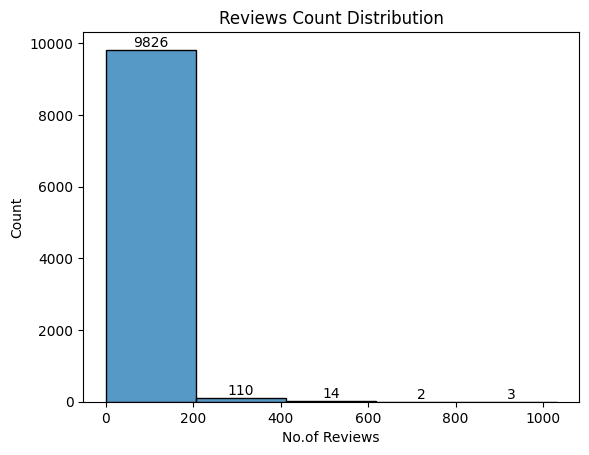

In [ ]:
# Univariate

ax = sns.histplot(zoto["Reviews_count"], bins=5)

# Add values on top of histogram blocks
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, str(int(height)), ha='center', va='bottom')

# Add labels
plt.xlabel('No.of Reviews')
plt.ylabel('Count')
plt.title('Reviews Count Distribution')

# Show plot
plt.show()


Based on the above analysis we can conclude that:


*   Reviews count distribution is maximum for the range **0-210** (approx) accounting for a count of **9826**.
*   While for the range **210-410** its **110** (approx) and accordingly for rest of the others it deteriorating.





.

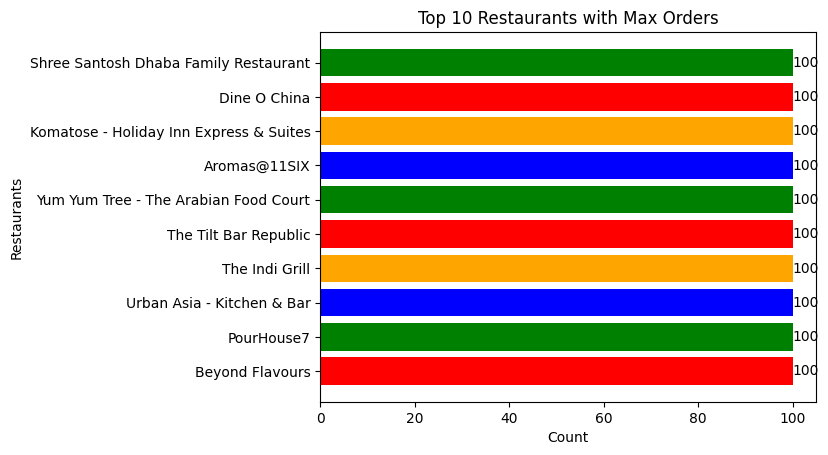

In [ ]:
ret = zoto["Restaurant"].value_counts().head(10)
ret

colors = ["Red", "Green", "Blue", "Orange"]

for i, value in enumerate(ret.values):
    plt.text(value, i, str(value), ha='left', va='center')

ax= plt.barh(ret.index, ret.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants with Max Orders")
plt.show()


We can conclude from the above output that:


*   There are numerous restaurants with an average count of **100** who has taken maximum numbers of orders.
*   Few of the listed restaurants amongst them are Shree Santosh Dhaba, Dine O China, The Indi Grill, PourHouse7  etc.



.

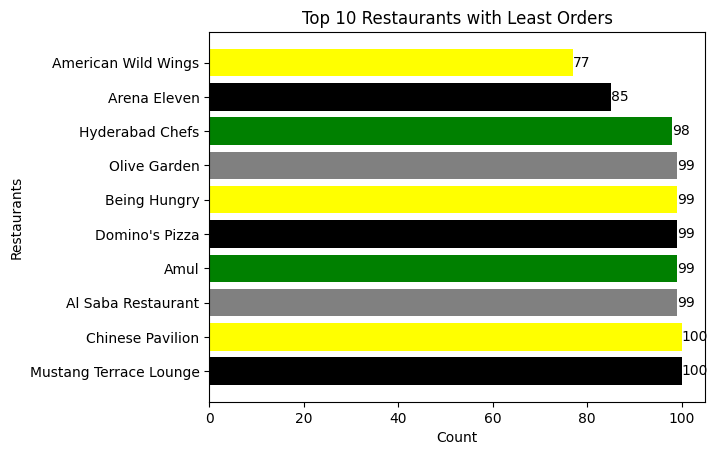

In [ ]:
ret = zoto["Restaurant"].value_counts().tail(10)
ret

colors = ["Black", "Yellow", "Grey", "Green"]

for i, value in enumerate(ret.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.barh(ret.index, ret.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants with Least Orders")
plt.show()

We can drive following analysis from above chart:



*   **American Wild Wings** is the least preferred Restaurant in terms of order booking count of **77**.
*   Followed by American Wild, **Arena Eleven** is the next least order making restaurant with count **85**.



.

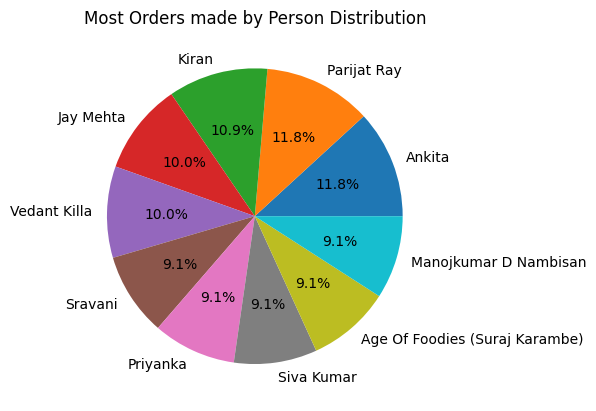

In [ ]:
rev = zoto["Reviewer"].value_counts().head(10)

plt.pie(rev.values, autopct='%1.1f%%', labels=rev.index)

plt.title("Most Orders made by Person Distribution")

plt.show()

From the above analysis we can deduce following result:


*   **Parijat Ray** is the customer who has placed orders most number of times contributing to a percentage share of **11.8%**.
*   Followed by Parijat **Kiran** has placed most number of orders with Zomato with a percentage contribution of **10.9%**.



.

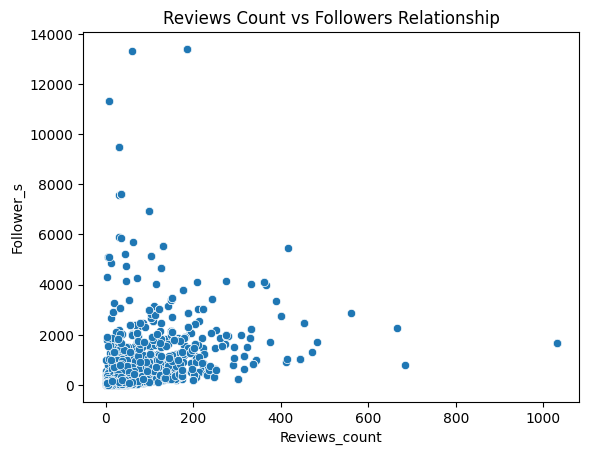

In [ ]:
# Multivariate

sns.scatterplot(data=zoto, x="Reviews_count", y="Follower_s")

plt.title("Reviews Count vs Followers Relationship")

plt.show()

From the above scattter plot we can define following relationship:


*   Reviews count **vs** followers count is dense in the range **0-400** for reviews count whereas **0-6000** for followers count.
*   As we move away from the dense range the count starts decreasing considerably for both the features.




.

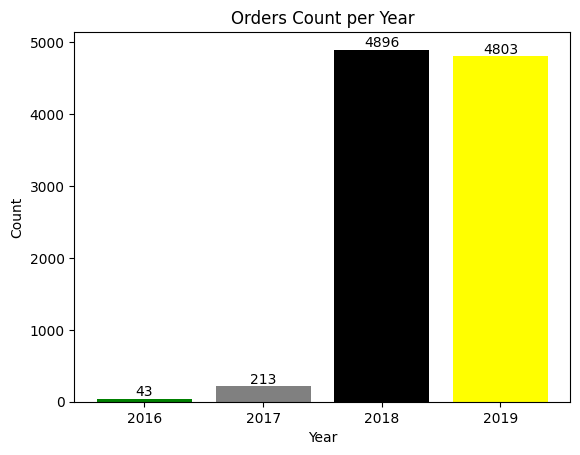

In [ ]:
s = zoto["Year"].value_counts()

color = ["Black", "Grey"]

plt.bar(s.index, s.values, color = colors)
plt.xticks(s.index.astype(int))   # To avoid floating year displayed while plotting graph

for i, value in enumerate(s.values):
    plt.text(s.index[i], value, str(value), ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Orders Count per Year")
plt.show()

The bar chart above shows following results:


*   From **2016 to 2017**, the orders placed with Zomato shows an incremental **growth** while from **2017-2018** it shows a **tremendous growth** but from **2018 to 2019** a slight **dip** can also be observed.
*   The count of orders placed in year **2016** is **least** i.e., **43**. But for year **2018** it's **4896** which is **maximum**.



.

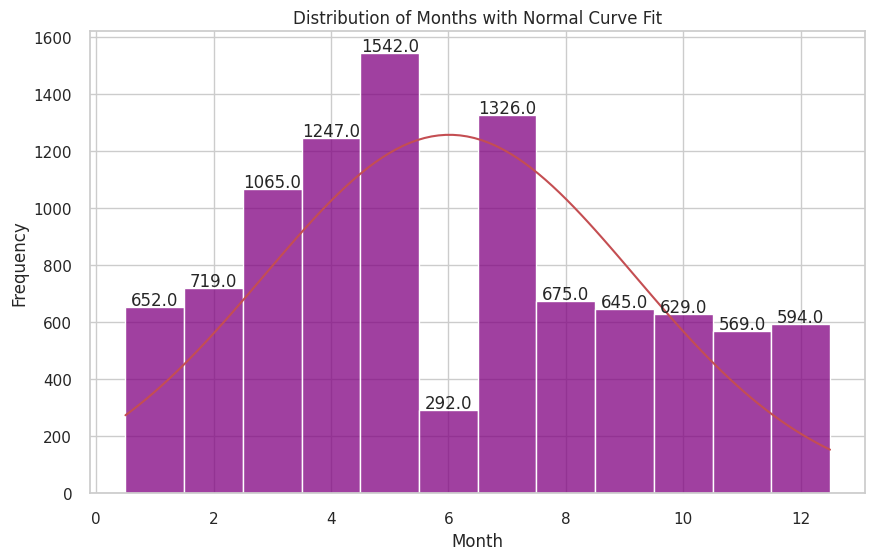

In [60]:
from scipy import stats

plt.figure(figsize=(10, 6))
ax = sns.histplot(zoto['Month'], kde=False, color="purple", bins=12, discrete=True)

# Normalize data and fit a normal distribution
(mean, std) = stats.norm.fit(zoto['Month'])
x = np.linspace(0.5, 12.5, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf * len(zoto['Month']) * (12 / 12), 'r')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),  # Format the count
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

# Set titles and labels
plt.title('Distribution of Months with Normal Curve Fit')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.show()


We can potray following analysis from above displot:

- From **Jan to May**, Zomato has seen an **incremental growth** in its order with **May** month getting the highest orders of **1542**.
- There is a **sudden decline** in number of orders placed for the month of **June** constituting for just **292**.
- In **July** there is a **sudden rise** in orders count of **1326**, then  again **drop** in orders count can be observed till the month of **Nov**.

.

<ipython-input-35-20af7e86375b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(fol.index, rotation=45, ha='right')
<ipython-input-35-20af7e86375b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(lof.index, rotation=45, ha='right')


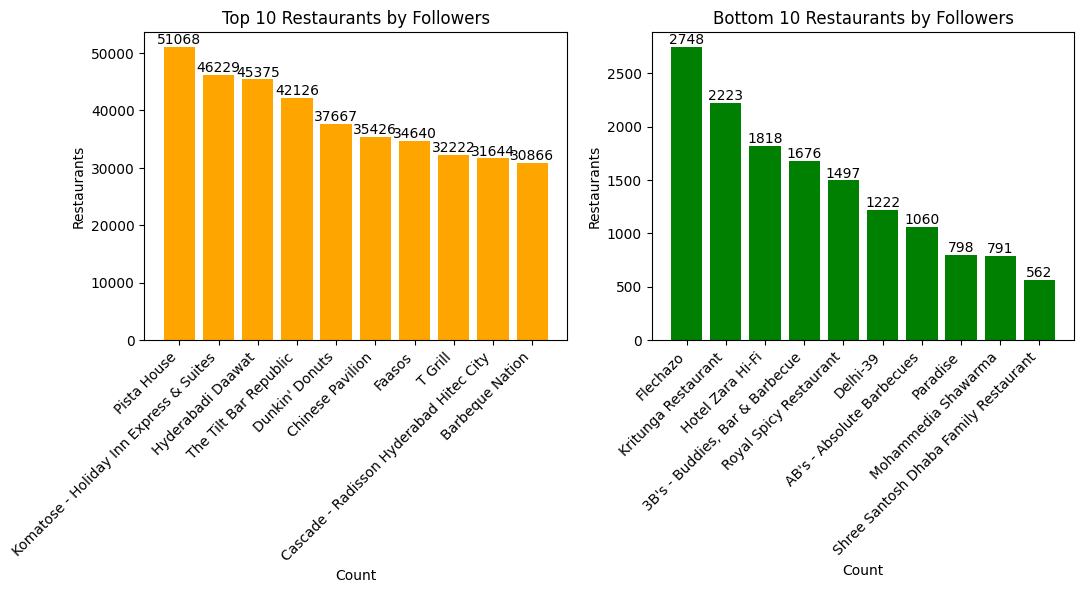

In [ ]:
fol = zoto.groupby("Restaurant")["Follower_s"].sum().sort_values(ascending=False).head(10)
lof = zoto.groupby("Restaurant")["Follower_s"].sum().sort_values(ascending=False).tail(10)

# Create a horizontal bar plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first subplot with bar chart
axs[0].bar(fol.index, fol.values, color='Orange', width=0.8)
axs[0].set_title('Top 10 Restaurants by Followers')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Restaurants')
axs[0].set_xticklabels(fol.index, rotation=45, ha='right')

# Plot the second subplot with bar chart
axs[1].bar(lof.index, lof.values, color='Green', width=0.8)
axs[1].set_title('Bottom 10 Restaurants by Followers')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Restaurants')
axs[1].set_xticklabels(lof.index, rotation=45, ha='right')

# Add values on top of the bars for the first subplot
for i, value in enumerate(fol.values):
    axs[0].text(i, value, str(value), ha='center', va='bottom')

# Add values on top of the bars for the second subplot
for i, value in enumerate(lof.values):
    axs[1].text(i, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

From the above chart we can find out following analysis:



*   **Pista House** is the restaurant with **hightest** no.of followers i.e., **51068** amongst all the other restaurants.
*   **Komatose** is the **next highest** followed restaurant in the list after Pista House with a followers count of **46228**.
*   **Shree Santosh Dhaba** has **least** followers with a count of **562** followed by **791** of **Mohammedia**.





.

<ipython-input-36-0d56d0a907d4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(rate.index, rotation=45, ha='right')
<ipython-input-36-0d56d0a907d4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(etar.index, rotation=45, ha='right')


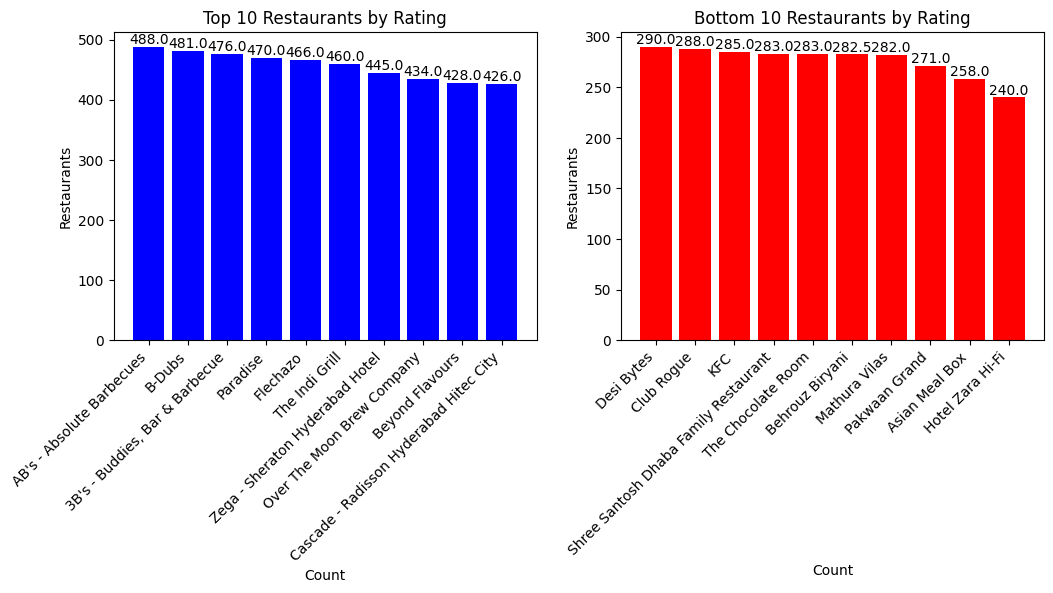

In [ ]:
# Group the data and calculate the sum of ratings for each restaurant
rate = zoto.groupby("Restaurant")["Rating"].sum().sort_values(ascending=False).head(10)
etar = zoto.groupby("Restaurant")["Rating"].sum().sort_values(ascending=False).tail(10)

# Create a horizontal bar plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first subplot with bar chart
axs[0].bar(rate.index, rate.values, color='blue', width=0.8)
axs[0].set_title('Top 10 Restaurants by Rating')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Restaurants')
axs[0].set_xticklabels(rate.index, rotation=45, ha='right')

# Plot the second subplot with bar chart
axs[1].bar(etar.index, etar.values, color='red', width=0.8)
axs[1].set_title('Bottom 10 Restaurants by Rating')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Restaurants')
axs[1].set_xticklabels(etar.index, rotation=45, ha='right')

# Add values on top of the bars for the first subplot
for i, value in enumerate(rate.values):
    axs[0].text(i, value, str(value), ha='center', va='bottom')

# Add values on top of the bars for the second subplot
for i, value in enumerate(etar.values):
    axs[1].text(i, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()


We can state following conlcusion from above summary:



*   **Absolute Barbecues** has received the **most** number of **ratings** when combined, making it one of the **best** user preferred restaurant, constituting for a rating count of **488**.
*   Followed by AB's, **B-Dubs** is the **next most** liked restaurant for its food with a rating count of **481**.
*   **Hotel Zara HiFi** has the **least** rating amongst all the listed restaurants with a count of **240**. Followed by **Asian Meal Box** with count **258**.







.

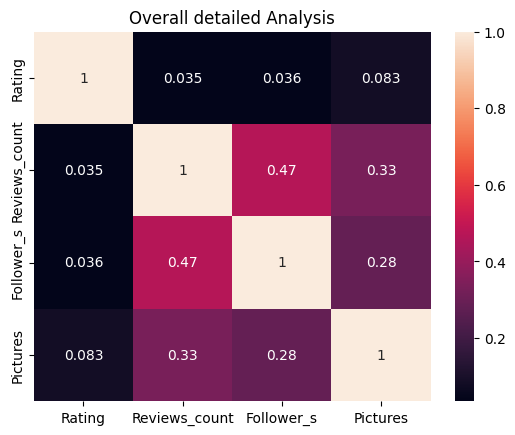

In [ ]:
# Correlation Heatmap visualization code

sns.heatmap(zoto[["Rating","Reviews_count","Follower_s","Pictures"]].corr(), annot= True)

plt.title("Overall detailed Analysis")

plt.show()

We can deduce following analysis from above heatmap:

*   We have picked numerical columns to study the bond amongst them which is quite differentiable in terms of color grading scale.
*   **Lightest color** with **1** depicts **strongest** bond whereas **darkest color** with **0** depicts weakest bond.
*   As we move from lightest i.e., 1 to darkest i.e., 0 in color grading scale the effective bonding keeps on deteriorating.
*   Its clear that the columns with itself share the strongest bond.
*   Reviews_count with rating shares **weakest** bond amongst all.
*   Reviews_count with followers shares **strongest** bond amongst all.




.

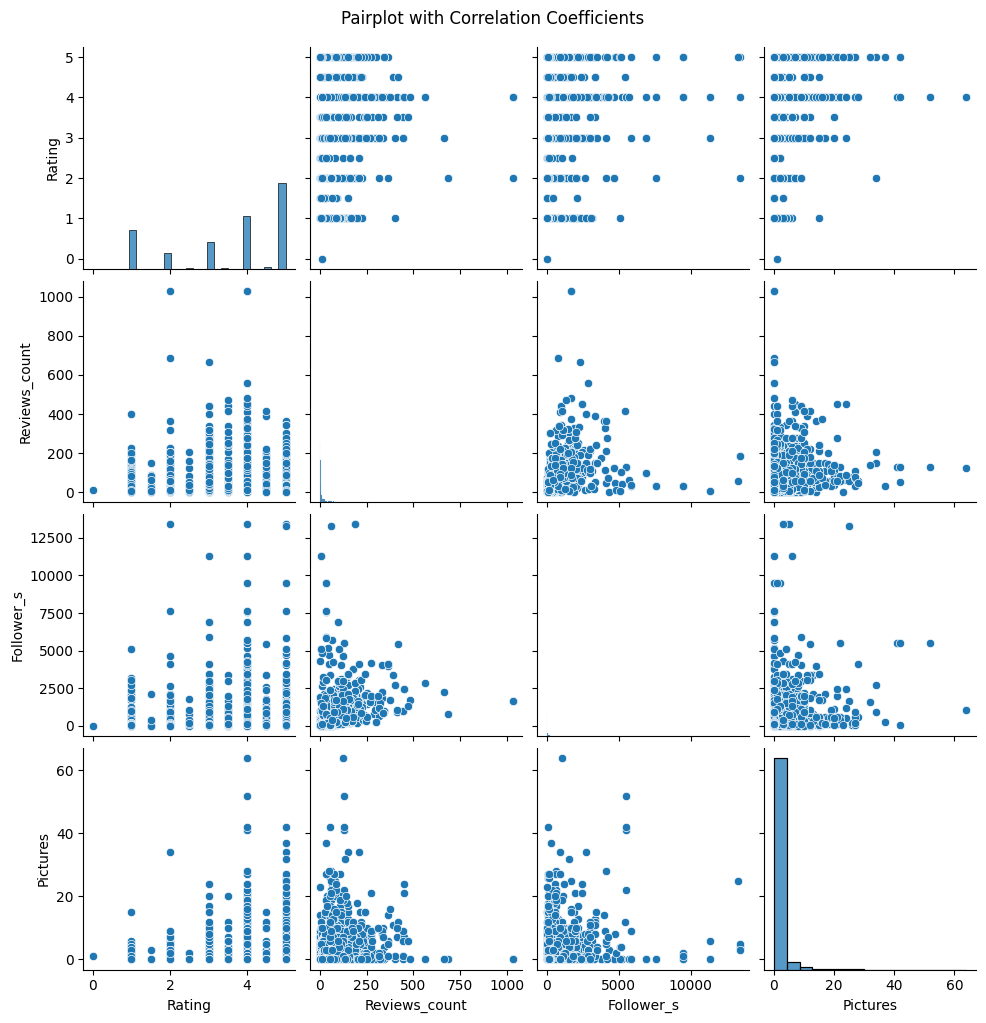

In [ ]:
# Pair Plot visualization code

final = zoto[["Rating", "Reviews_count", "Follower_s", "Pictures"]]

# Create a pairplot with annotated correlation values
sns.pairplot(final, kind='scatter')
plt.suptitle('Pairplot with Correlation Coefficients', y=1.02)
plt.show()



Following analysis can be drawn from the above pairplot:
- Out of all the columns we have extracted out the ones which are are numeric in nature and add some meaningful data to the analysis.
- The relationship chart gives clear highlights of how each column in the dataset shares a **correlation** with another.
- The peaks in the chart signifies **strongest correlation** when a specified column intersects with itself.
- The chart also shows how effectively a specific column shares relationship with other which could be clearly seen in terms of scattered distribution.

.

# A. Logistic Regression -

In [ ]:
rt = zoto["Rating"].value_counts()
a = rt.index
b = np.array(a)
print("For X: ", b)

d = np.array([1,1,0,1,0,1,1,1,0,0])   # Good ---> (1) or Bad ---> (0)
print("For Y: ",d)

For X:  [5.  4.  1.  3.  2.  4.5 3.5 2.5 1.5 0. ]
For Y:  [1 1 0 1 0 1 1 1 0 0]


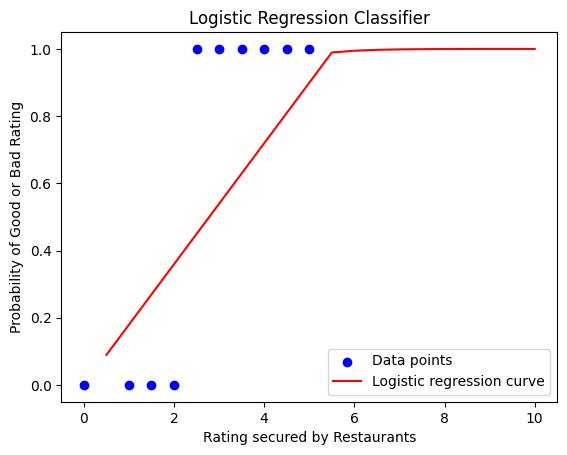

In [ ]:
# Sample data

X = b.reshape(-1,1)
y = d

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities for new data points
new_rating = np.array([0.5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)
predicted_probabilities = model.predict_proba(new_rating)[:, 1]  # Probability of Good or Bad Rating

# Plot the data points and the logistic regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(new_rating, predicted_probabilities, color='red', label='Logistic regression curve')
plt.xlabel('Rating secured by Restaurants')
plt.ylabel('Probability of Good or Bad Rating')
plt.title('Logistic Regression Classifier')
plt.legend()
plt.show()


In order to get a better insight from above **Logistic Regression Classifier ML model** we are considering rating out of **10** and will predict the result (Probability of being **Good** or **Bad**) based on the future ratings gained:


*   The **Blue** data points resembles all the **known** ratings that restaurants have been rated with.
*   The **Logistic regression curve** touchs all the **unknown** data points, which we are willing to predict.
*   **Rating <= 2** has been defined as **Bad**.
*   **Rating > 2** has been defined as **Good**.
*   Since **0.5** is the rating that no restaurant has been tagged with so far, so from the curve above its clear that it will fall under **bad** if any restaurant gets 0.5 as rating in near future.
*   If a restaurant is rated with anything **above 5** it will be considered as **Good**.



.

# B. K Means Clustering -

In [19]:
from sklearn.cluster import KMeans

lst = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(zoto[['Rating', 'Reviews_count']])
    lst.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

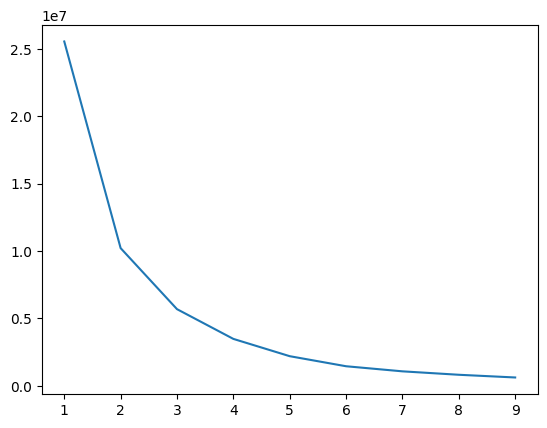

In [ ]:
plt.plot(range(1,10), lst)    # Elbow method

**Elbow Method:**
- As we increase the number of clusters from **1 to 9**, the inertia decreases. However, after at certain point, the rate of decrease in inertia slows down significantly. This point is like the '**elbow**' of the plot.

- In this example, the curve seems to make a significant deviation around **3 clusters**. This suggests that **3** is the optimal **number of clusters** for this particular dataset. Beyond this point, increasing the number of clusters doesn't provide any significant improvement in the clustering.

- This method is useful in deciding the most appropriate number of clusters to use in k-means





In [30]:
X = zoto[['Rating', 'Reviews_count']].values
km = KMeans(n_clusters=3, random_state=42)
ymean = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
score = silhouette_score(X, ymean)

print("Silhouette Score: ", round(score, 2))

Silhouette Score:  0.81


**Silhouette Score:**

- Just like Elbow method **Silhouette Scor**e also justifies the approach of choosing **3** as no.of clusters. We can confidently make this statement as Silhouette Score is **0.81** which is nearly equal to 1. 1 being considered as the best Silhouette Score.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.8264297937914825


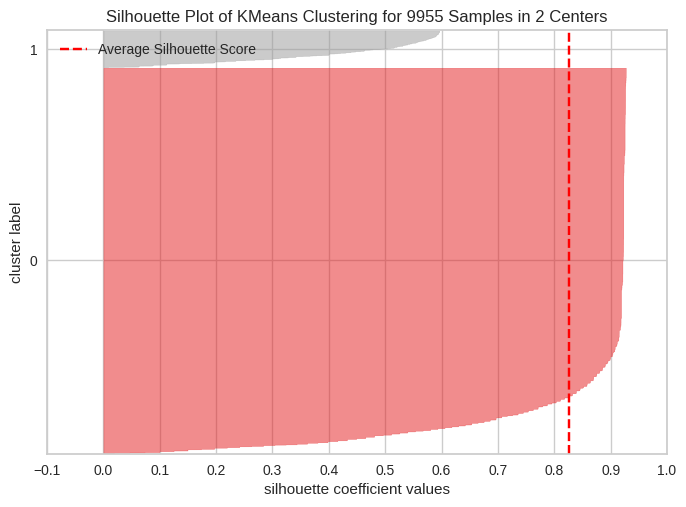

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.8050922593966914


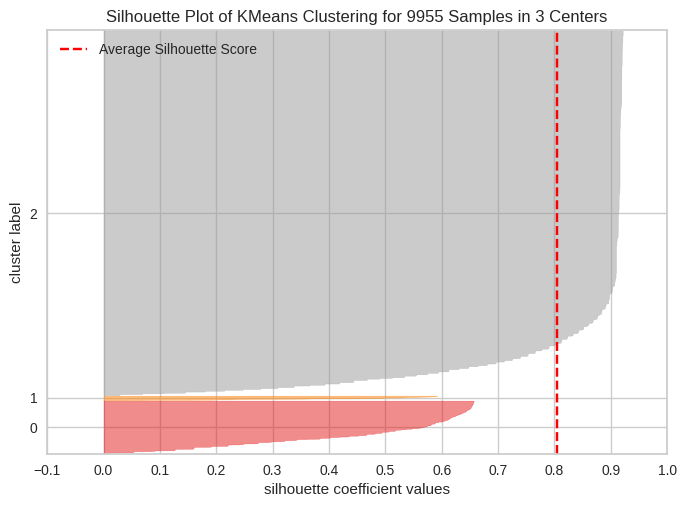

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.7791383126881868


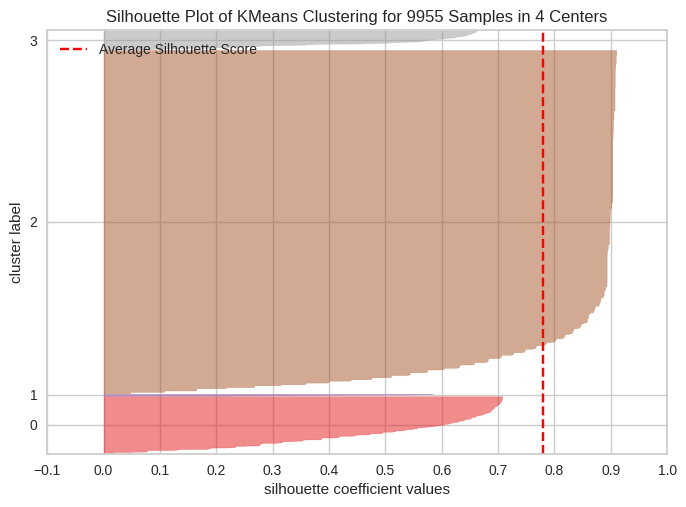

In [34]:
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()

silhouette_analysis(5)

Text(0.5, 1.0, 'K-Means Clustering')

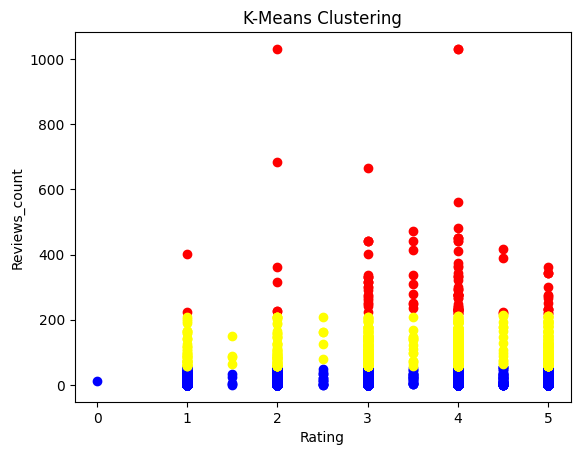

In [ ]:
# Plpotting the graph based on input feed we have

plt.scatter(X[ymean == 0, 0], X[ymean == 0, 1], color="blue")
plt.scatter(X[ymean == 1, 0], X[ymean == 1, 1], color="red")
plt.scatter(X[ymean == 2, 0], X[ymean == 2, 1], color="yellow")

plt.xlabel('Rating')
plt.ylabel('Reviews_count')
plt.title('K-Means Clustering')

The above **K means clustering** depicts following analysis:


*   **1st group (yellow)** comprises of all the ratings and reviews_count ranging from **0-50** (approx).
*   **2nd group (blue)** comprises of all the ratings and reviews_count ranging from **51-200** (approx).
*   **3rd group (red)** comprises of all the ratings and reviews_count ranging from **201-above** (approx).


.

# C. K Means Clustering 2 -

In [ ]:
from sklearn.cluster import KMeans

lst2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(zoto[['Follower_s', 'Reviews_count']])
    lst2.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

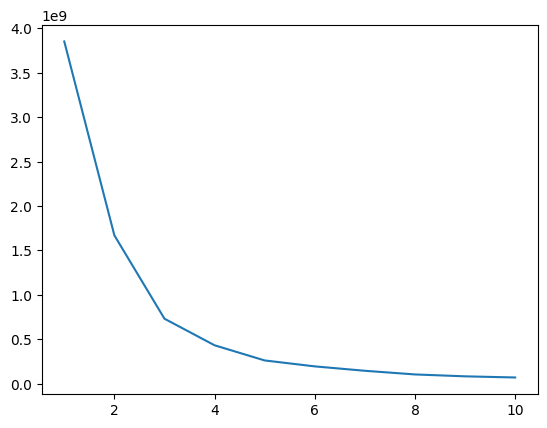

In [ ]:
# Elbow Method

plt.plot(range(1,11), lst2)

**Elbow Method:**

- In this example, the curve seems to make a significant deviation around **3 clusters**. This suggests that **3** is the optimal **number of clusters** for this particular dataset. Beyond this point, increasing the number of clusters doesn't provide any significant improvement in the clustering.

In [43]:
X1 = zoto[['Follower_s', 'Reviews_count']].values
km1 = KMeans(n_clusters=3, random_state=42)
y1mean = km.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# Silhouette score

score = silhouette_score(X1, y1mean)

print("Silhouette Score: ", round(score, 2))

Silhouette Score:  0.91


**Silhouette Score:**

- Just like Elbow method **Silhouette Scor**e also justifies the approach of choosing **3** as no.of clusters. We can confidently make this statement as Silhouette Score is **0.91** which is nearly equal to 1. 1 being considered as the best Silhouette Score.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.9259894561901811


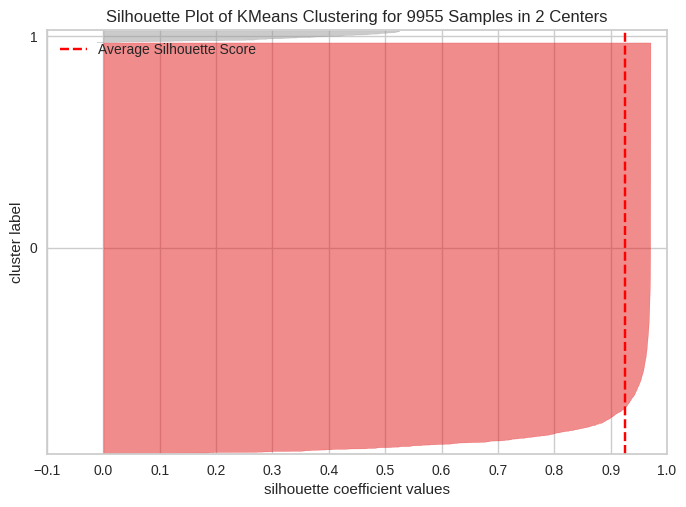

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.9058378221418345


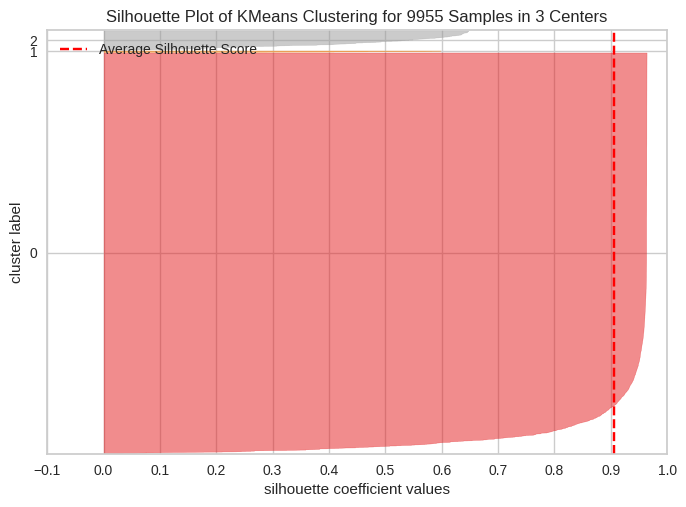

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.8924029810407892


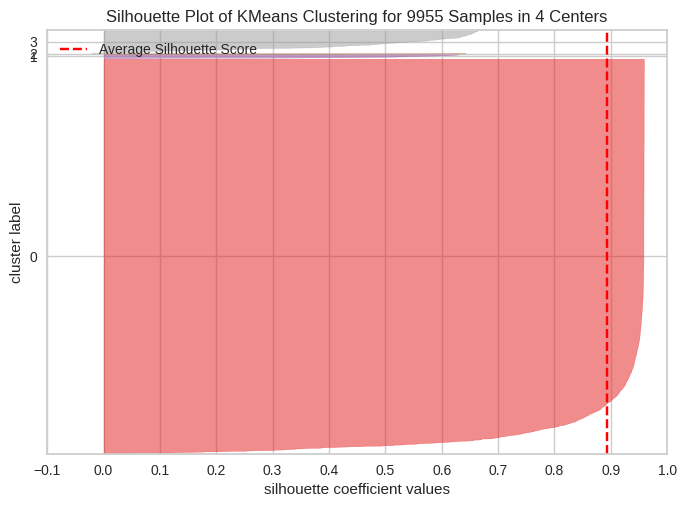

In [46]:
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km1 = KMeans(n_clusters=n_clusters)
    preds = km1.fit_predict(X1)
    centers = km1.cluster_centers_

    score = silhouette_score(X1, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km1)

    visualizer.fit(X1)
    visualizer.poof()

silhouette_analysis(5)

Text(0.5, 1.0, 'K-Means Clustering')

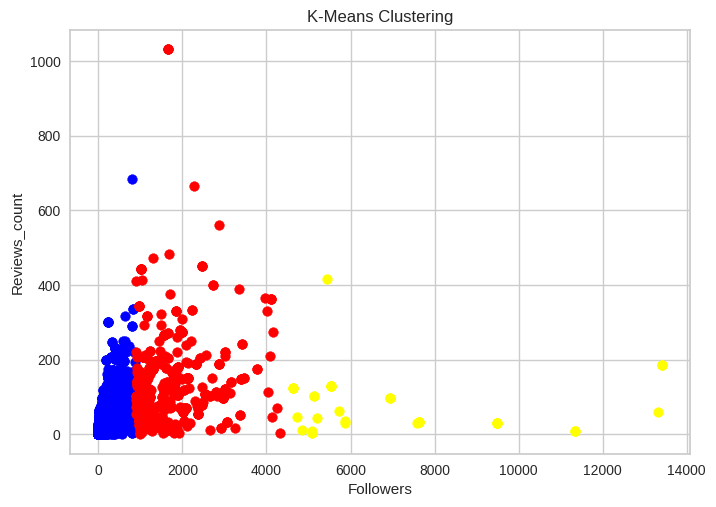

In [42]:
plt.scatter(X1[y1mean == 0, 0], X1[y1mean == 0, 1], color="blue")
plt.scatter(X1[y1mean == 1, 0], X1[y1mean == 1, 1], color="red")
plt.scatter(X1[y1mean == 2, 0], X1[y1mean == 2, 1], color="yellow")

plt.xlabel('Followers')
plt.ylabel('Reviews_count')
plt.title('K-Means Clustering')

The above K means clustering depicts following analysis:

- **1st group (blue)** exhibits a dense relationship b/w followers and reviews count forecasting lower the followers lesser is reviews count and depicts a balance b/w the two.
- **2nd group (red)** exhibits slightly dispersed datapoints stating that as followers increases reviews count also increases> Moreover few outliers sort of data points can also be seen depicting pretty huge rise in reviews count even for moderate level of followers.
- **3rd group (yellow)** exhibits highly dispersed and less dense region stating that there are very few reviews count with respect to followers. Moreover reviews count is very less even though followers are significantly pretty huge in number.

.

# D. Hierarchical Clustering -

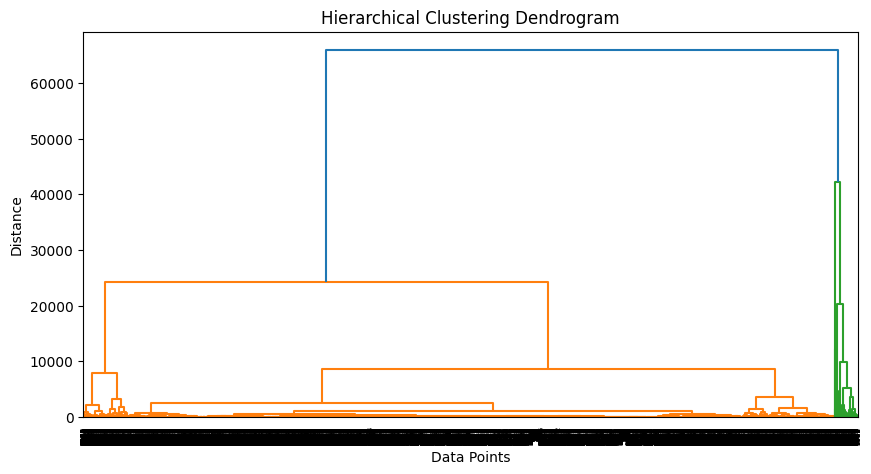

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X = zoto[['Follower_s', 'Reviews_count']].values

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


We can deduce following analysis from above Hierarchical Clustering:

- The method=**'ward'** argument is used to specify **Ward's linkage method** for hierarchical clustering. This method aims to **minimize** the total within-cluster **variance** at each step, effectively seeking to merge clusters that result in the smallest increase in total variance.
- The **linkage function** calculates the **distances between all pairs** of clusters and iteratively merges the most similar or closest pairs. This process continues until all points are grouped into a **single cluster**, resulting in a hierarchy of clusters.
- The output of the hierarchical clustering, denoted as **matrix Z**, encapsulates the details of the merging process. Each row in this matrix represents a merge operation, indicating which clusters were merged and the distance at which this occurred.
- By selecting a **cutoff threshold** on the dendrogram's vertical axis, different clustering solutions can be derived. This cutoff level determines the distance beyond which clusters are not merged, effectively controlling the number of clusters. Adjusting this threshold allows for exploration of the clustering structure at various **levels of granularity**.

.

# E. Hierarchical Clustering 2 -

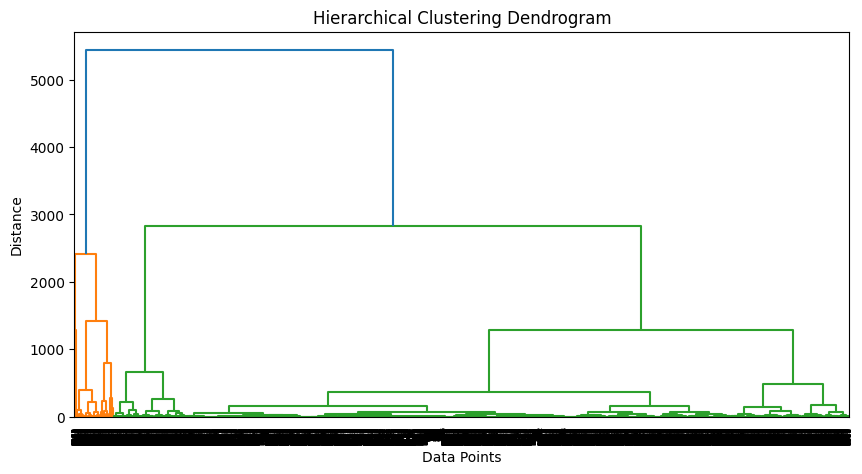

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
import sys
sys.setrecursionlimit(2000)

X1 = zoto[['Reviews_count','Rating']].values

Z = linkage(X1, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Follwing statement can be interpreted from the above graph:

- The method='**ward**' parameter configures the hierarchical clustering to use **Ward's method**, which strategically **minimizes** the **increase** in total intra-cluster **variance** with each cluster combination.
- The **linkage function** performs the core operations of hierarchical clustering by **systematically computing** the **proximities** between every **pair of clusters**. This function then proceeds to merge the closest clusters iteratively, building up a hierarchical structure from the bottom up, until a single cluster encapsulates all data points.
- The hierarchical clustering's output is captured in **matrix Z**, a comprehensive log of the cluster merging activity.
- The **dendrogram** is plotted using the matplotlib library, offering a visual representation of the clustering process. This plot outlines the **sequence** and nature of **cluster mergers**, as well as the distance levels at which these unions occur, serving as a **visual summary** of the **hierarchical clustering**.



---

